# Métodos de bisección y Newton

### Ejercicio 1.
### Dada la ecuación
### $$\tan(x)= \frac{1}{x-1}$$
### se pide:

### a) Prepara la ecuación, localiza y separa gráficamente sus dos soluciones negativas más cercanas a $x=0$ en intervalos de anchura $0.5$.

### b) Realiza manualmente dos pasos del método de bisección para aproximar la solución negativa más cercana a $x=0$.

### c) Calcula aproximadamente las soluciones indicadas en el apartado (a) mediante el método de bisección, con error absoluto menor que $10^{-8}$. 


SOLUCIÓN:

### a) Prepara la ecuación, localiza y separa gráficamente sus dos soluciones negativas más cercanas a $x=0$ en intervalos de anchura $0.5$

Paso 1. Localizar y separar las raíces.

Analicemos la ecuación   $$\tan(x) - 1/(x-1) = 0$$  Si la ploteamos, sin pensar 
demasiado, obtenemos la siguiente representación gráfica.

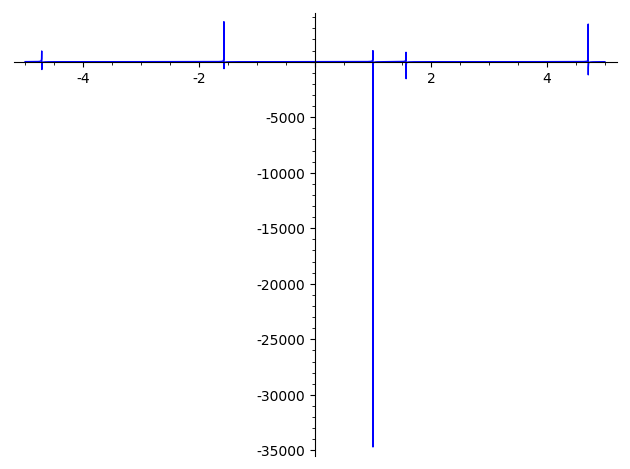

In [1]:
plot(tan(x)-1/(x-1),-5,5) 

Observamos que la función $$\tan(x) - \frac{1}{x-1}$$ tiene varias asíntotas verticales.
Por un lado, $x-1$ se anula en $x=1$, además, $$\tan(x)=\frac{\sin(x)}{\cos(x)}$$ por lo que se anula cuando el $\cos$ se anula, es decir, para 
$$-\pi/2, + \pi/2, -3\pi/2, + 3\pi/2, etc$$
Estas son las asíntotas que vemos en la anterior celda. Por tanto, no podemos trabajar directamente con la función en el estado original.

Realmente, la función que debemos dibujar es aquella que podemos transformar de la siguiente manera

$$\tan(x) - \dfrac{1}{x-1}=0$$

$$\tan(x)=\dfrac{1}{x-1}$$

$$\dfrac{\sin(x)}{\cos(x)}=\dfrac{1}{x-1}$$

$$\sin(x)(x-1)=\cos(x)$$

$$\sin(x)(x-1)-\cos(x)=0$$ 

$$f(x)=\sin(x)(x-1)-\cos(x)$$.

In [2]:
f(x)=sin(x)*(x-1)-cos(x)
f

x |--> (x - 1)*sin(x) - cos(x)

Si ahora dibujamos la función f obtenemos la siguiente gráfica.

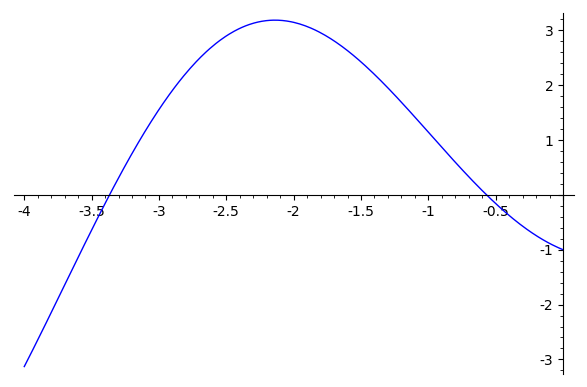

In [3]:
plot(f,-4,0)

Por lo que vemos las dos soluciones negativas, una alrededor de -3.5 y otra alrededor de -0.5. Observemos más de cerca ambas soluciones y las representamos tal y como pide el ejercicio en intervalos de anchura de 0.5:

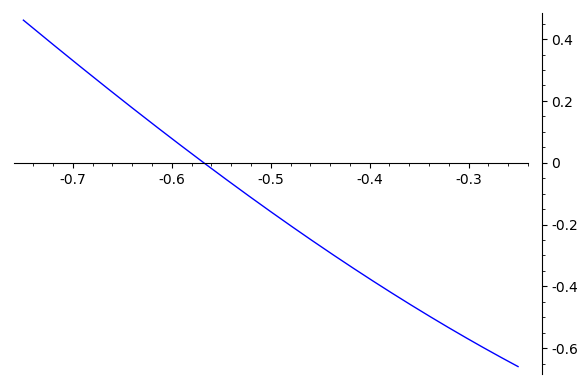

In [4]:
plot(f,-0.75,-0.25) 
#La representación cercana a la solución -0.5 y de intervalo (-0.75,-0.25)

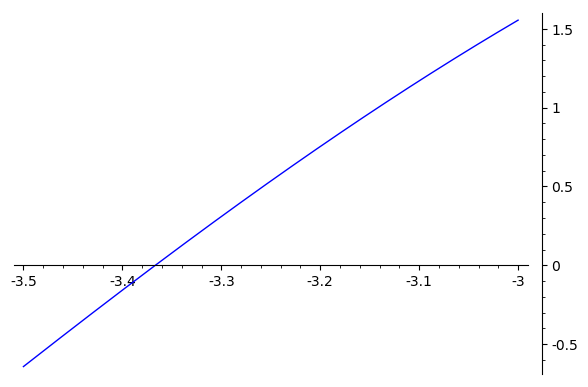

In [5]:
plot(f,-3.5,-3)
#La representación cercana a la solución -3.5 y de intervalo (-3.5,-3)

### b) Realiza manualmente dos pasos del método de bisección para aproximar la solución negativa más cercana a $x=0$.

Para realizar este apartado recordemos teóricamente en que consiste el método de bisección.

## Método de bisección

El método de bisección se basa en el siguiente resultado:

### Teorema de Bolzano y de unicidad de raíces.-

Si $f$ es una función continua en un intervalo $[a,b]$ y que cumple $f(a)·f(b)<0$ entonces,

existe $c$ en el intervalo $(a,b)$ de forma que $f(c) = 0$.

Si además, la función es creciente o decreciente en dicho intervalo $c$ es único.

Tal y cómo nos indica la palabra bisección suponemos en un primer paso que el valor $c$ es el punto intermedio del intervalo $[a,b]$. Veamos en nuestro caso particular como se realiza.

In [6]:
#Calculamos el punto medio de[a,b] para solución cercana a -0.5. 
#En b) se pide la solución más cercana a x=0 que es la más cercana a -0.5.
#El intervalo que tomamos inicialmente es el que observamos en a).
a=-0.75
b=-0.25
a0=a
b0=b
c0=(a0+b0)/2;c0

-0.500000000000000

Evaluamos la función en los extremos del intervalo y en el punto medio. Es importante seguir el orden.

In [7]:
f(a0),f(c0),f(b0)

(0.461178961167014, -0.158444253984068, -0.659657472642491)

Definimos el nuevo intervalo dependiendo de los sigunos de las evaluaciones anteriores. Como, $f(a_0)$ y $f(c_0)$ tienen el mismo signo, el nuevo intervalo es $[c_0,b_0]$.

In [8]:
a1=a0
b1=c0
c1=(a1+b1)/2;c1

-0.625000000000000

In [9]:
f(a1),f(c1),f(b1)

(0.461178961167014, 0.139819949023033, -0.158444253984068)

Definimos el nuevo intervalo dependiendo de los signos de las evaluaciones anteriores. Como $f(c_1)$ y $f(b_1)$ tienen el mismo signo, el nuevo intervalo es $[a_1,c_1]$.

In [10]:
a2=c1
b2=b1
c2=(a2+b2)/2;c2

-0.562500000000000

In [11]:
f(c2)

-0.0126390718310365

y así sucesivamente  vamos definiendo intervalos más pequeños, aproximándonos a la raíz.

### c) Calcula aproximadamente las soluciones indicadas en el apartado (a) mediante el método de bisección, con error absoluto menor que $10^{-8}$. 

Para realizar este apartado recordemos teóricamente como se acota el error en el método de bisección.

## Métodos de bisección y su acotación del ERROR

Observamos que si una ecuación $f(x)=0$ tiene una raíz en el intervalo $(a,b)$. 
El número $N$ de pasos del método de bisección que tenemos que dar para alcanzar la precisión deseada debe cumplir
$$\displaystyle N>\dfrac{\log\left(\frac{b-a}{\varepsilon}\right)}{\log 2}-1$$ donde $[a,b]$ es el intervalo inicial y $\varepsilon$ es el error permitido.
Entonces, calculamos el número de pasos en nuestro caso particular:

In [12]:
a=-0.75
b=-0.25
epsilon=10^(-8)
numerical_approx(log((b-a)/epsilon)/log(2)-1)

24.5754247590989

Luego serán necesarios, como mucho, $N=25$ pasos.

In [13]:
a,b

(-0.750000000000000, -0.250000000000000)

In [14]:
contador=0
N=25
a0=a
b0=b
c0=(b0+a0)/2

In [15]:
while not f(c0)==0 and contador<N:
    if f(a0)*f(c0)<0:
        b0=c0
        c0=(b0+a0)/2  
    else:
        a0=c0
        c0=(b0+a0)/2
    contador=contador+1
c0

-0.567782022058964

In [16]:
show(contador)
show(f(c0))

25

3.36311256621258e-9

Observamos que $c_0$ es el valor que aproxima a la raíz de $f$ cercana a $-0.5$ y tiene error menor que $10^{-8}$. De hecho podemos calcular directamente la raíz pidiéndola con la siguiente sentencia y comprobar que realmente tiene el error adecuado.

In [17]:
show(c0)
show(find_root(f(x),a,b))
abs(c0-find_root(f(x),a,b)) < 10^(-8)

-0.567782022058964

-0.5677820206560978

True

Hagamos el mismo proceso para la otra raíz cercana -3.5 y que acotamos gráficamente en el apartado a) sobre el intervalo (-3.5,-3)

In [18]:
a=-3.5
b=-3
epsilon=10^(-8)
numerical_approx(log((b-a)/epsilon)/log(2)-1)

24.5754247590989

In [19]:
a,b

(-3.50000000000000, -3)

In [20]:
contador=0
N=25
a0=a
b0=b
c0=(b0+a0)/2

In [21]:
while not f(c0)==0 and contador<N:
    if f(a0)*f(c0)<0:
        b0=c0
        c0=(b0+a0)/2  
    else:
        a0=c0
        c0=(b0+a0)/2
    contador=contador+1
c0

-3.36671587079763

In [22]:
show(contador)
show(f(c0))

25

3.17345564271321e-8

Observamos que $c_0$ es el valor que aproxima a la raíz de $f$ cercana a $-3.5$ y tiene error menor que $10^{-8}$. De hecho podemos calcular directamente la raíz pidiéndola con la siguiente sentencia y comprobar que realmente tiene el error adecuado.

In [4]:
show(c0)
show(find_root(f(x),a,b))
abs(c0-find_root(f(x),a,b)) < 10^(-8)

NameError: name 'c0' is not defined